In [74]:
import matplotlib.pyplot as plt
import face_recognition as fr

In [75]:
def draw_landmarks(ax, im, color="r", size=2, show_original=True):
  """ Draws landmarks around an image """
  landmarks = fr.face_landmarks(im)
  xs = []
  ys = []
  for landmark in landmarks:
    for k, v in landmark.items():
      xs += [x[0] for x in v]
      ys += [x[1] for x in v]
  if show_original:
    ax.imshow(im)
  else:
    ax.imshow(np.ones(im.shape))
  ax.scatter(x=xs, y=ys, c=color, s=size)

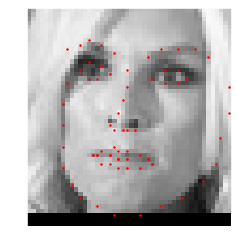

In [77]:
fig, ax = plt.subplots()
img = fr.load_image_file('./../dataset/train/angry/Training_33331.jpg')
img_landmarks = draw_landmarks(ax, img)

In [2]:
%matplotlib inline
from imutils.face_utils import FaceAligner
from imutils.face_utils import rect_to_bb
from PIL import Image
import imutils, cv2, dlib
import numpy as np
import matplotlib.pyplot as plt

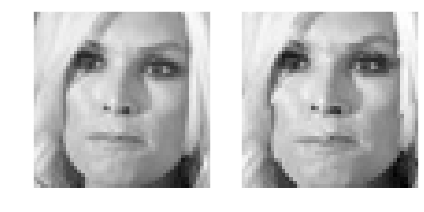

In [3]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')
fa = FaceAligner(predictor, desiredLeftEye=(0.3,0.3), desiredFaceWidth=48)

image = cv2.imread('./../dataset/train/angry/Training_33331.jpg')
image = imutils.resize(image, width=800)
face = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
gray_face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
rect = detector(face, 1)
if (len(rect) > 0):
    rect = rect[0]
    fig = plt.figure()
    axes = []
    face_aligned = fa.align(face, gray_face, rect)
    # display the output images
    axes.append(fig.add_subplot(1, 2, 1))
    plt.imshow(image)
    axes.append(fig.add_subplot(1, 2, 2))
    plt.imshow(face_aligned)
    fig.tight_layout()    
    plt.show()